In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,job_len,hq_base,hq_city,lochq,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,0,Functional Analytics Lead\n\nJob details:\nWor...,3,Capgemini,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,Enterprise Software & Network Solutions,...,2462.0,France,Paris,0,53,1,1,1,0,0
1,1,Provide analytical insights into emerging prob...,3,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,...,1452.0,CA,San Jose,0,22,1,1,0,0,0
2,2,Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3,Oracle,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,Enterprise Software & Network Solutions,...,1777.0,CA,Redwood City,0,43,1,1,0,0,0
3,3,"At Amazon, we strive to be most customer-centr...",4,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,...,4616.0,WA,Seattle,0,26,1,1,1,1,1
4,5,Overview\n\n\nWe have an exciting opportunity ...,4,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,...,2405.0,United Kingdom,Hitchin,0,25,1,1,0,0,0


In [4]:
df[df['Company Name'] == 'Star India']

,Unnamed: 0,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,job_len,hq_base,hq_city,lochq,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
83,93,KEY RESPONSIBILITIES :\nUsing techniques from ...,4,Star India,Mumbai,"Mumbai, India",51 to 200 employees,-1,Company - Private,Film Production & Distribution,...,2305.0,India,Mumbai,1,-1,1,1,0,0,1


In [5]:
#Unnamed col is not needed, thus dropping it 
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,job_len,hq_base,hq_city,lochq,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Functional Analytics Lead\n\nJob details:\nWor...,3,Capgemini,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,...,2462.0,France,Paris,0,53,1,1,1,0,0
1,Provide analytical insights into emerging prob...,3,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,...,1452.0,CA,San Jose,0,22,1,1,0,0,0
2,Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3,Oracle,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,Enterprise Software & Network Solutions,Information Technology,...,1777.0,CA,Redwood City,0,43,1,1,0,0,0
3,"At Amazon, we strive to be most customer-centr...",4,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,...,4616.0,WA,Seattle,0,26,1,1,1,1,1
4,Overview\n\n\nWe have an exciting opportunity ...,4,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,2405.0,United Kingdom,Hitchin,0,25,1,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Description    337 non-null    object 
 1   Rating             337 non-null    int64  
 2   Company Name       337 non-null    object 
 3   Location           337 non-null    object 
 4   Headquarters       337 non-null    object 
 5   Size               337 non-null    object 
 6   Founded            337 non-null    int64  
 7   Type of ownership  337 non-null    object 
 8   Industry           337 non-null    object 
 9   Sector             337 non-null    object 
 10  Revenue            337 non-null    object 
 11  Competitors        337 non-null    object 
 12  Annual Min         337 non-null    int64  
 13  Annual Max         337 non-null    int64  
 14  Avg Salary         337 non-null    float64
 15  job_type           337 non-null    object 
 16  job_seniority      337 non

## Company Ratings

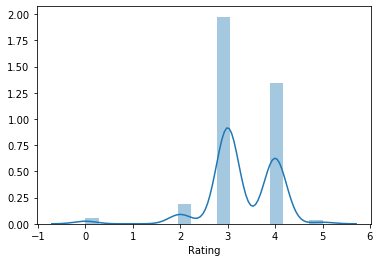

In [8]:
#df['Rating'].hist(bins=15, kde=True)
sns.distplot(df['Rating'])

 Max ratings are between 3.5 and 4.5, although some jobs have rating of 0 and 5 as well.

In [9]:
#a quick look of mean, min and max values 
df['Rating'].describe()

count    337.000000
mean       3.293769
std        0.715302
min        0.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

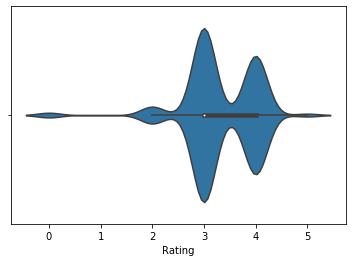

In [10]:
#using a violin plot to understand the same 
sns.violinplot(df['Rating'])
plt.show()

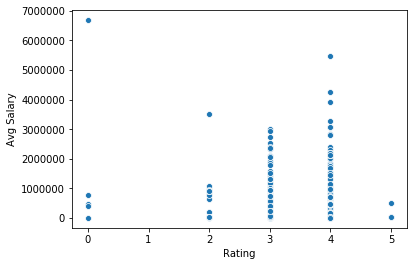

In [11]:
#checking how salary varies with Rating 
sns.scatterplot(x='Rating', y='Avg Salary', data=df)

As the company ratings increase, there is a rise in the salary, but we also see that companies with rating 0 have offered the highest salary [seems wrong]

In [12]:
#to make sure we see all columns
pd.set_option('display.max_columns', None)

df[df['Rating'] == 0]

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Annual Min,Annual Max,Avg Salary,job_type,job_seniority,job_len,hq_base,hq_city,lochq,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
39,"Min. Exp: 3 years\nAhmedabad, India\nJob Role\...",0,iqm.com,Ahmedabad,"New York, NY",1 to 50 employees,2014,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,448000,492000,470000.0,data scientist,na,1380.0,NY,New York,0,6,1,1,1,0,0
123,We are looking for the following kind of profe...,0,Number Theory,Gurgaon,"Gurgaon, India",Unknown,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,-1,380000,416000,398000.0,data scientist,na,1557.0,India,Gurgaon,1,-1,1,1,1,0,0
230,We are inviting application for the post of Se...,0,iNICU Medical Private Limited,New Delhi,"New Delhi, India",1 to 50 employees,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,-1,6438000,6923000,6680500.0,data scientist,senior,989.0,India,New Delhi,1,-1,1,1,1,0,1
234,About Crediwatch\n\nCrediwatch is an insights-...,0,Crediwatch,Bengaluru,"Bengaluru, India",1 to 50 employees,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,-1,755000,826000,790500.0,data scientist,senior,6442.0,India,Bengaluru,1,-1,1,1,0,1,0
258,Extensive experience working with large comple...,0,Intellithink,Chennai,"Chennai, India",1 to 50 employees,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,-1,7000,7000,7000.0,data scientist,senior,418.0,India,Chennai,1,-1,1,1,0,0,0


The highest salary [~700K] are given for Sr. Data scientist [not sure if this is incorrect data]

## Age of the Company

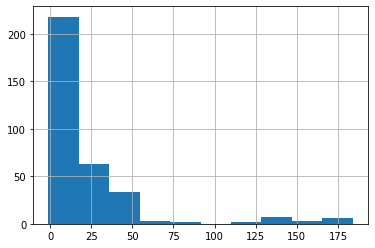

In [13]:
df['age'].hist()

Most companies hiring for Data Scientists are founded in the last 30 years, although there are some companies which are more than 150 [Siemens, Swiss Re, P&G] years old and hiring for the same positions 

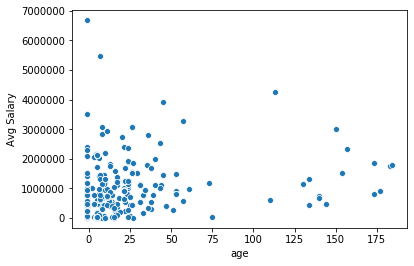

In [14]:
#checking how salary varies with Rating 
sns.scatterplot(x='age', y='Avg Salary', data=df)

This is a very cluttered plot because most companies are recently founded but it is note worthy that companies that are oldest offer fairly high salaries then their younger competitiors 

## Job description and salaries 

In [15]:
df.columns

Index(['Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Annual Min', 'Annual Max', 'Avg Salary', 'job_type',
       'job_seniority', 'job_len', 'hq_base', 'hq_city', 'lochq', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

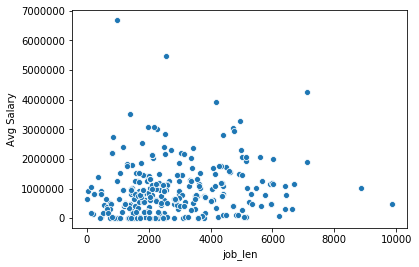

In [16]:
#checking how salary varies with Rating 
sns.scatterplot(x='job_len', y='Avg Salary', data=df)

In [17]:
df['job_len'].describe()

count     337.000000
mean     2841.382789
std      1667.657289
min        14.000000
25%      1654.000000
50%      2471.000000
75%      4002.000000
max      9852.000000
Name: job_len, dtype: float64

The Approx JD length is ~3K words but has a wide range from as less as 14 words to as high as 10K words

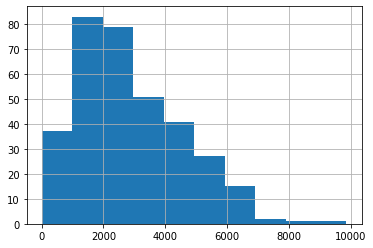

In [18]:
df['job_len'].hist()

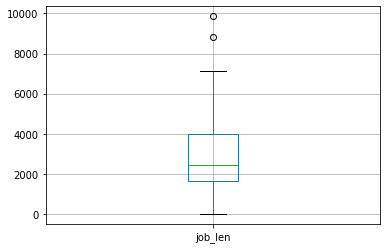

In [19]:
#checking for outliers 
df.boxplot(column = ['job_len'])

## Checking for co-relation

In [20]:
df1 = df[['age','Rating','Avg Salary','job_len']]

In [21]:
df1.corr()

,age,Rating,Avg Salary,job_len
age,1.000000,0.026989,0.188949,0.208260
Rating,0.026989,1.000000,0.062632,-0.055228
Avg Salary,0.188949,0.062632,1.000000,0.057677
job_len,0.208260,-0.055228,0.057677,1.000000


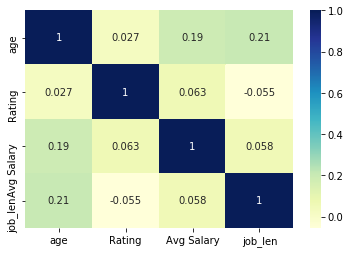

In [22]:
#cmap = sns.diverging_palette(220,10, as_cmap=True)
cmap="YlGnBu"
sns.heatmap(df1.corr(), cmap=cmap, annot=True)

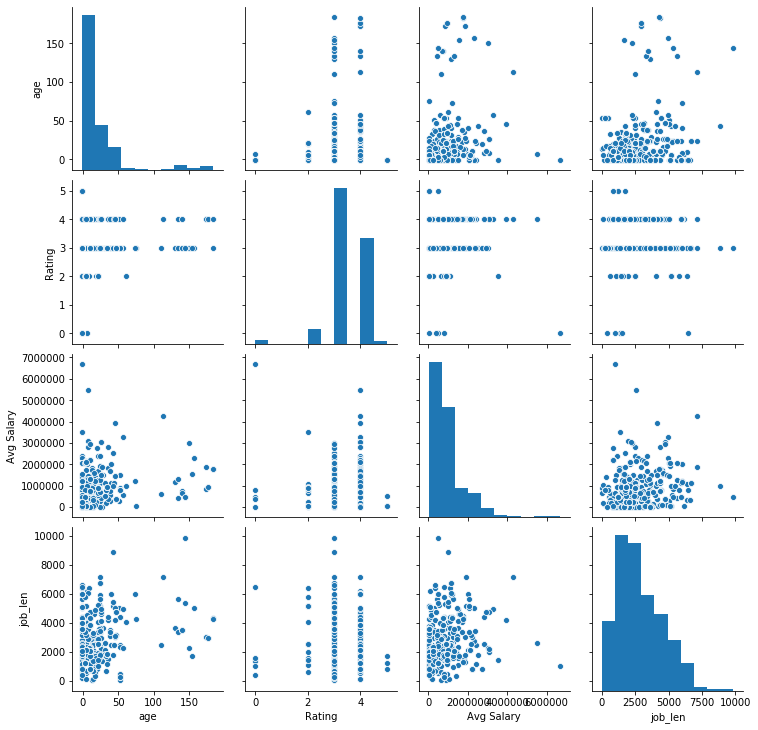

In [23]:
sns.pairplot(df1)

## Categorical columns

In [24]:
df.columns

Index(['Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Annual Min', 'Annual Max', 'Avg Salary', 'job_type',
       'job_seniority', 'job_len', 'hq_base', 'hq_city', 'lochq', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [25]:
#Picking out only the Categorical data from the columns
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
             'Annual Min', 'Annual Max', 'Avg Salary','hq_base','hq_city',
             'lochq','python_yn', 'R_yn','spark_yn', 'aws_yn',
             'excel_yn','job_type' ,'job_seniority']]

Graph for Location:total = 23


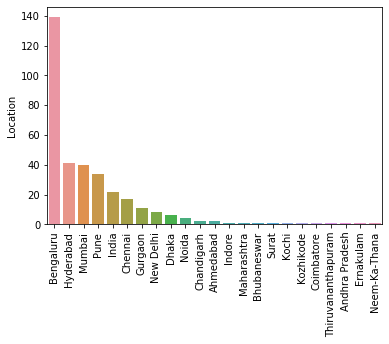

Graph for Headquarters:total = 102


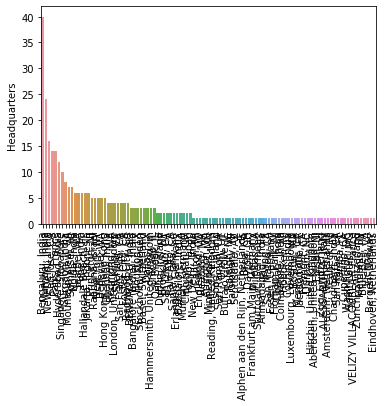

Graph for Size:total = 8


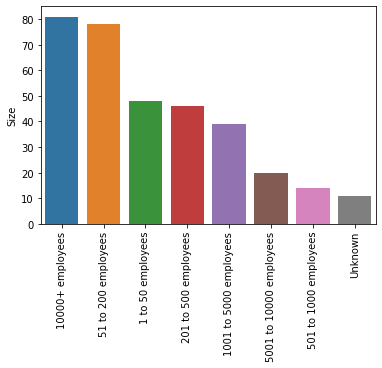

Graph for Type of ownership:total = 7


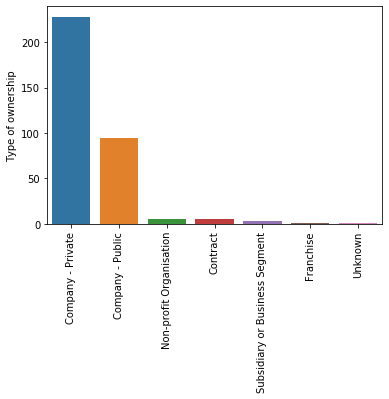

Graph for Industry:total = 41


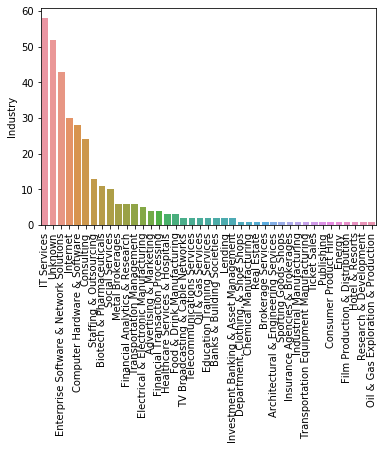

Graph for Sector:total = 20


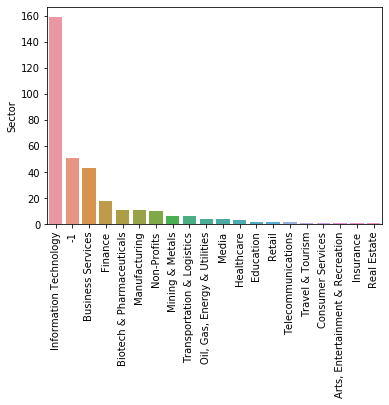

Graph for Revenue:total = 11


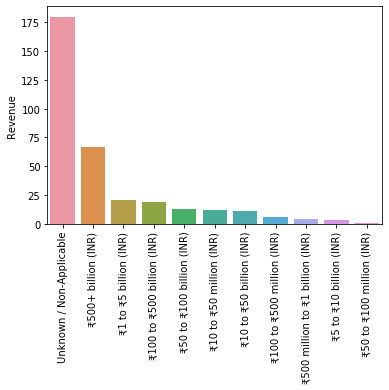

Graph for Annual Min:total = 209


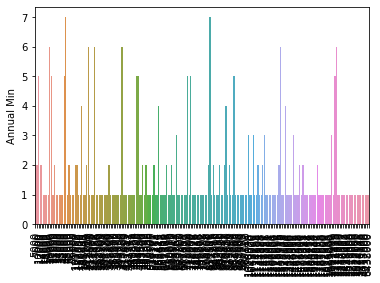

Graph for Annual Max:total = 214


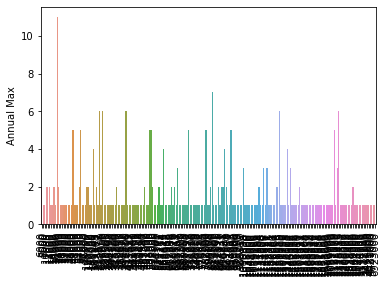

Graph for Avg Salary:total = 217


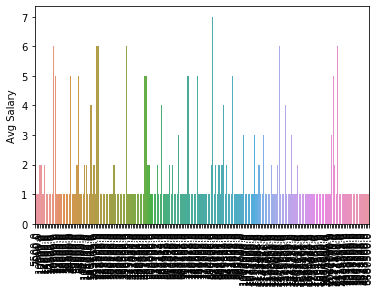

Graph for hq_base:total = 38


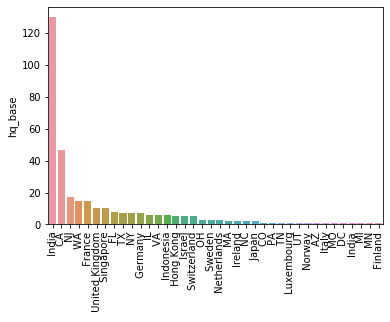

Graph for hq_city:total = 101


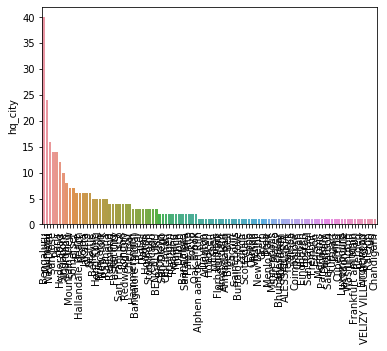

Graph for lochq:total = 2


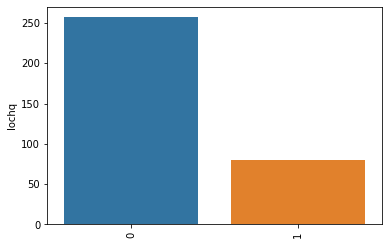

Graph for python_yn:total = 2


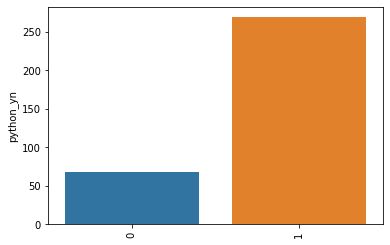

Graph for R_yn:total = 2


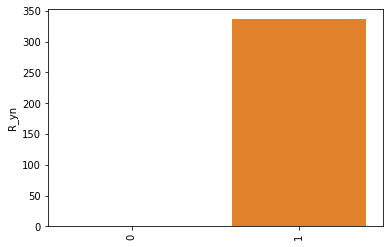

Graph for spark_yn:total = 2


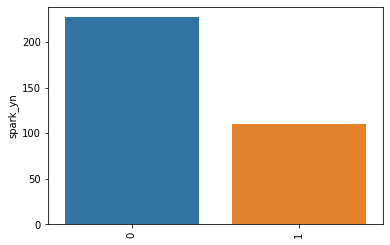

Graph for aws_yn:total = 2


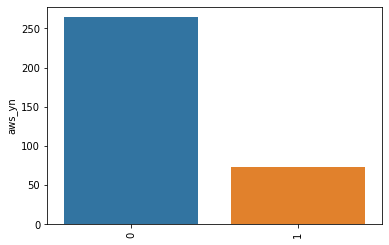

Graph for excel_yn:total = 2


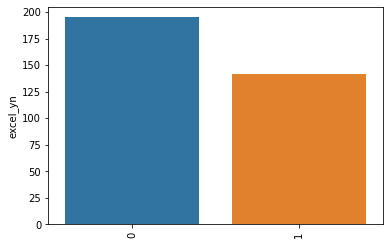

Graph for job_type:total = 1


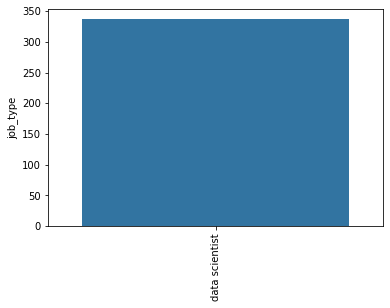

Graph for job_seniority:total = 3


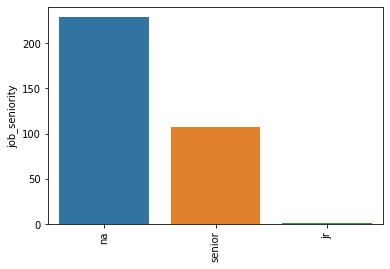

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location:total = 5


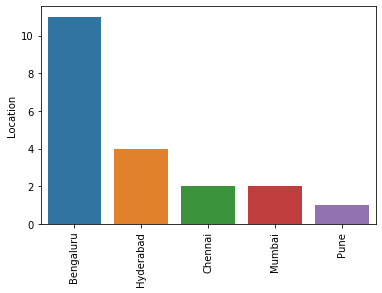

Graph for Avg Salary:total = 20


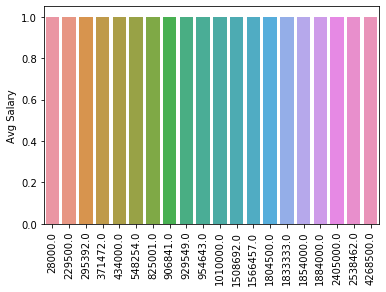

Graph for Headquarters:total = 19


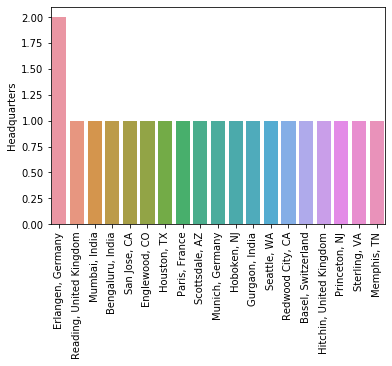

In [27]:
for i in df_cat[['Location','Avg Salary','Headquarters']].columns: #Picking only three fields which we want to focus
    cat_num = df_cat[i][:20].value_counts() #Taking only top 20 stats
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Description    337 non-null    object 
 1   Rating             337 non-null    int64  
 2   Company Name       337 non-null    object 
 3   Location           337 non-null    object 
 4   Headquarters       337 non-null    object 
 5   Size               337 non-null    object 
 6   Founded            337 non-null    int64  
 7   Type of ownership  337 non-null    object 
 8   Industry           337 non-null    object 
 9   Sector             337 non-null    object 
 10  Revenue            337 non-null    object 
 11  Competitors        337 non-null    object 
 12  Annual Min         337 non-null    int64  
 13  Annual Max         337 non-null    int64  
 14  Avg Salary         337 non-null    float64
 15  job_type           337 non-null    object 
 16  job_seniority      337 non

## Which industry offers the highest pay

In [29]:
df.groupby(['Industry'])['Avg Salary'].mean().astype(int).sort_values(ascending=False)

df[df['Industry'] == 'Oil & Gas Exploration & Production']

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Annual Min,Annual Max,Avg Salary,job_type,job_seniority,job_len,hq_base,hq_city,lochq,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
6,Job Title\nData Scientist\n\n20-Jan-2020\n\nNo...,4,Shell,Chennai,"Houston, TX",10000+ employees,1907,Company - Public,Oil & Gas Exploration & Production,"Oil, Gas, Energy & Utilities",₹500+ billion (INR),"ExxonMobil, BP, Chevron",4057000,4480000,4268500.0,data scientist,na,7129.0,TX,Houston,0,113,1,1,1,0,1


'Shell' is the company that has the avg salary of 4.2M, Also there is only one row for this industry which makes it harder to generalize the salary across this domain/industry

## Which companies in Mumbai are offering high pay

In [30]:
df[df['Location'] == 'Mumbai'][['Company Name','Avg Salary']].sort_values(by='Avg Salary',ascending=False)

,Company Name,Avg Salary
125,Boston Consulting Group,3278146.0
55,Star,2311000.0
40,Tata Insights and Quants,1997500.0
114,Indus OS,1736842.0
34,Directi,1690680.0
203,General Mills,1533808.0
7,Star TV Network,1508692.0
104,TEQNirvana,1038000.0
99,Bigtree Entertainment Pvt.Ltd.,810526.0
226,Arya.ai,771500.0


We see that highest pay is offered by 'Boston Consulting Group'. Also an important point to note is that for some companies there are multiple rows, on further checking we concluded that this is because of the multiple job positions/responsisbilties posted by the companies 